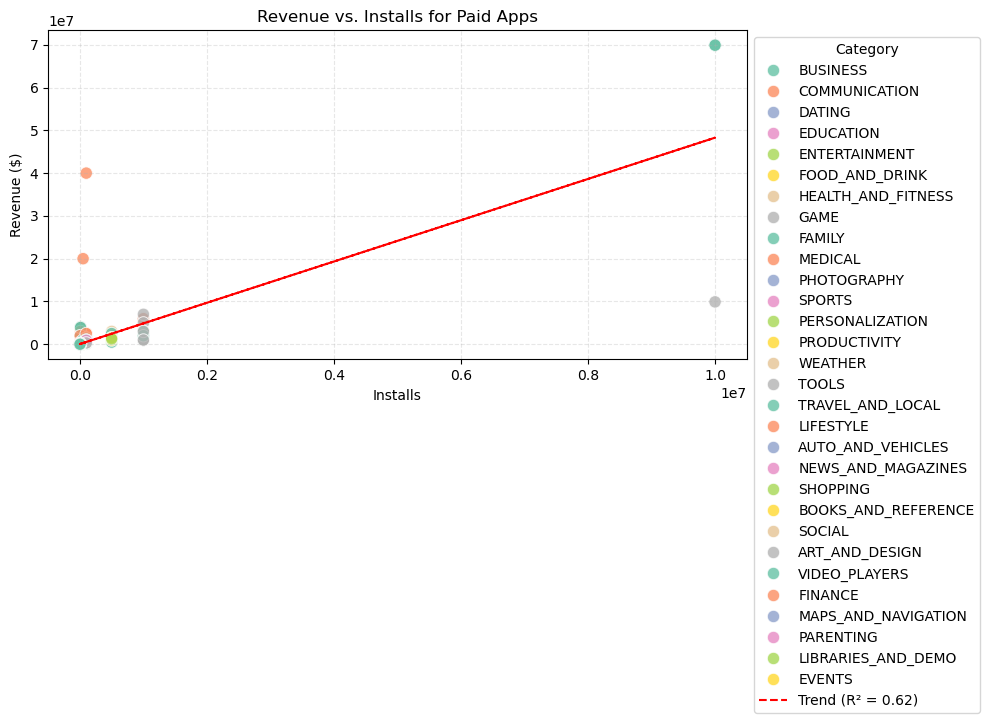

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('googleplaystore.csv')
df_paid = df[df['Type'] == 'Paid'].copy()
df_paid['Price'] = df_paid['Price'].str.replace('$', '').astype(float)
df_paid['Installs'] = df_paid['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df_paid['Revenue'] = df_paid['Price'] * df_paid['Installs']
df_paid = df_paid.dropna(subset=['Revenue', 'Installs', 'Category'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Revenue', hue='Category', data=df_paid, 
                palette='Set2', s=80, alpha=0.8)
slope, intercept, r_value = stats.linregress(df_paid['Installs'], df_paid['Revenue'])[:3]
plt.plot(df_paid['Installs'], slope * df_paid['Installs'] + intercept, 
         color='red', linestyle='--', label=f'Trend (R² = {r_value**2:.2f})')
plt.xlabel('Installs')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs. Installs for Paid Apps')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()